<a href="https://colab.research.google.com/github/camilasanchezg1/icfesproject/blob/main/sprint_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Archivo cargado correctamente: (63, 13)
📅 Columnas detectadas: ['AÑO 2014', 'AÑO 2015', 'AÑO 2016', 'AÑO 2017', 'AÑO 2018', 'AÑO 2019', 'AÑO 2020', 'AÑO 2021', 'AÑO 2022', 'AÑO 2023', 'AÑO 2024']

✅ Conversión completada (valores 1–5):
   AÑO 2014  AÑO 2015  AÑO 2016  AÑO 2017  AÑO 2018  AÑO 2019  AÑO 2020  \
0       2.0       2.0       2.0         2       2.0       2.0       1.0   
1       4.0       4.0       4.0         4       4.0       3.0       3.0   
2       3.0       3.0       3.0         3       3.0       3.0       2.0   
3       1.0       1.0       1.0         1       1.0       1.0       2.0   
4       3.0       3.0       3.0         4       3.0       3.0       3.0   

   AÑO 2021  AÑO 2022  AÑO 2023  AÑO 2024  
0       2.0         2         2       2.0  
1       3.0         3         3       2.0  
2       3.0         3         3       4.0  
3       2.0         2         2       2.0  
4       3.0         3         3       3.0  

📈 Promedios calculados:
AÑO 2014    2.758065
A

/tmp/ipython-input-1655723457.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


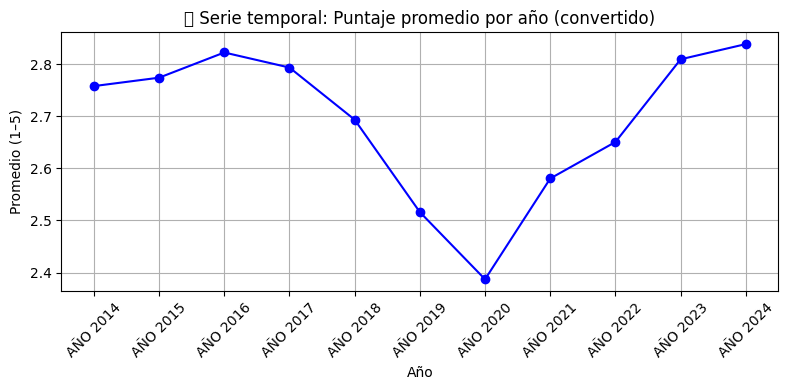

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


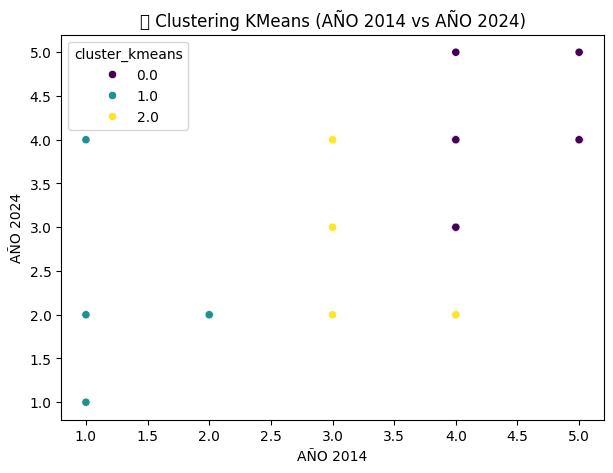


🔮 Pronóstico ARIMA (5 años siguientes):
AÑO 2025: 2.84
AÑO 2026: 2.84
AÑO 2027: 2.84
AÑO 2028: 2.84
AÑO 2029: 2.84

🧠 Entrenando modelo LSTM...

🔮 Predicciones LSTM (5 años siguientes):
AÑO 2025: 2.60
AÑO 2026: 2.60
AÑO 2027: 2.58
AÑO 2028: 2.54
AÑO 2029: 2.54


In [43]:

# 1️⃣ Instalar librerías necesarias (solo en Colab)
!pip install --quiet statsmodels tensorflow scikit-learn pandas matplotlib seaborn

# 2️⃣ Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 3️⃣ Cargar dataset
df = pd.read_csv("/content/Pruebas_ICFES_20251104.csv")
print("✅ Archivo cargado correctamente:", df.shape)

# 4️⃣ Detectar columnas de años
columnas_anos = [col for col in df.columns if "AÑO" in col.upper()]
print("📅 Columnas detectadas:", columnas_anos)

# =====================================================
# 5️⃣ Conversión robusta de letras a números
# =====================================================
mapa_notas = {"A": 5, "B": 4, "C": 3, "D": 2, "NR": 1}

for col in columnas_anos:
    # Limpiar texto: quitar espacios y estandarizar
    df[col] = df[col].astype(str).str.strip().str.upper()
    # Mapear letras a números
    df[col] = df[col].map(mapa_notas)
    # Convertir a numérico (fuerza errores como NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\n✅ Conversión completada (valores 1–5):")
print(df[columnas_anos].head())

# =====================================================
# 6️⃣ Serie temporal: promedio por año
# =====================================================
ts_data = df[columnas_anos].mean(axis=0, skipna=True)
print("\n📈 Promedios calculados:")
print(ts_data)

plt.figure(figsize=(8,4))
plt.plot(ts_data.index, ts_data.values, marker='o', color='b', linestyle='-')
plt.title("📈 Serie temporal: Puntaje promedio por año (convertido)")
plt.xlabel("Año")
plt.ylabel("Promedio (1–5)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =====================================================
# 7️⃣ Clustering (usando todos los años)
# =====================================================
df_clean = df[columnas_anos].dropna()
X = df_clean.values

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_kmeans'] = np.nan
df.loc[df_clean.index, 'cluster_kmeans'] = kmeans.fit_predict(X)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['AÑO 2014'],
    y=df['AÑO 2024'],
    hue=df['cluster_kmeans'],
    palette='viridis'
)
plt.title("🔹 Clustering KMeans (AÑO 2014 vs AÑO 2024)")
plt.xlabel("AÑO 2014")
plt.ylabel("AÑO 2024")
plt.show()

# =====================================================
# 8️⃣ Modelo ARIMA
# =====================================================
from warnings import filterwarnings
filterwarnings("ignore")

if len(ts_data) > 3:
    arima_model = ARIMA(ts_data.values, order=(1,1,1))
    arima_fit = arima_model.fit()
    forecast = arima_fit.forecast(steps=5)

    ult_anio = int(columnas_anos[-1].split()[-1])
    print("\n🔮 Pronóstico ARIMA (5 años siguientes):")
    for i, val in enumerate(forecast, start=ult_anio+1):
        print(f"AÑO {i}: {val:.2f}")
else:
    print("⚠️ No hay suficientes datos para aplicar ARIMA.")

# =====================================================
# 9️⃣ Modelo LSTM
# =====================================================
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts_data.values.reshape(-1,1))

def create_sequences(data, seq_length=3):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

if len(ts_scaled) > 5:
    seq_length = 3
    X_seq, y_seq = create_sequences(ts_scaled, seq_length)
    X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(seq_length,1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    print("\n🧠 Entrenando modelo LSTM...")
    model.fit(X_seq, y_seq, epochs=50, verbose=0)

    # Predicción
    last_seq = ts_scaled[-seq_length:].reshape(1, seq_length, 1)
    preds = []
    for _ in range(5):
        next_val = model.predict(last_seq, verbose=0)
        preds.append(next_val[0,0])
        last_seq = np.concatenate([last_seq[:,1:,:], next_val.reshape(1,1,1)], axis=1)

    preds = scaler.inverse_transform(np.array(preds).reshape(-1,1))

    print("\n🔮 Predicciones LSTM (5 años siguientes):")
    for i, val in enumerate(preds.flatten(), start=ult_anio+1):
        print(f"AÑO {i}: {val:.2f}")
else:
    print("No hay suficientes datos para entrenar LSTM.")
